# First Baseline CNN Model (No CV)
- Built basic CNN from scratch (3 conv + FC dense layers).
- Trained on 80% data while valdated on 20% (random, no stratification).
- Saved 4 Models and compared them together.
- Logged as benchmark model for comparison.

<table style="background-color: #000000; color: white; border-collapse: collapse; text-align: center;">
  <tr>
    <th style="border: 1px solid white; padding: 8px;">Metric</th>
    <th style="border: 1px solid white; padding: 8px;">Model 1 (100 epoch- 50 each)</th>
    <th style="border: 1px solid white; padding: 8px;">Model 2</th>
    <th style="border: 1px solid white; padding: 8px; background-color: #1e3d32; font-weight: bold;">Model 3</th>
    <th style="border: 1px solid white; padding: 8px;">Model 4</th>
  </tr>
  <tr>
    <td style="border: 1px solid white; padding: 8px;">Validation Accuracy</td>
    <td style="border: 1px solid white;">0.8261</td>
    <td style="border: 1px solid white;">0.7826</td>
    <td style="border: 1px solid white; background-color: #1e3d32; font-weight: bold;">0.8090</td>
    <td style="border: 1px solid white;">0.8137</td>
  </tr>
  <tr>
    <td style="border: 1px solid white; padding: 8px;">Validation Loss</td>
    <td style="border: 1px solid white;">0.4988</td>
    <td style="border: 1px solid white;">0.6469</td>
    <td style="border: 1px solid white; background-color: #1e3d32; font-weight: bold;">0.5187</td>
    <td style="border: 1px solid white;">0.4985</td>
  </tr>
  <tr>
    <td style="border: 1px solid white; padding: 8px;">Test Accuracy</td>
    <td style="border: 1px solid white;">0.863787</td>
    <td style="border: 1px solid white;">0.833887</td>
    <td style="border: 1px solid white; background-color: #1e3d32; font-weight: bold;">0.877076</td>
    <td style="border: 1px solid white;">0.860465</td>
  </tr>
  <tr>
    <td style="border: 1px solid white; padding: 8px;">Test Precision</td>
    <td style="border: 1px solid white;">0.869657</td>
    <td style="border: 1px solid white;">0.842789</td>
    <td style="border: 1px solid white; background-color: #1e3d32; font-weight: bold;">0.879784</td>
    <td style="border: 1px solid white;">0.864262</td>
  </tr>
  <tr>
    <td style="border: 1px solid white; padding: 8px;">Test Recall</td>
    <td style="border: 1px solid white;">0.863787</td>
    <td style="border: 1px solid white;">0.833887</td>
    <td style="border: 1px solid white; background-color: #1e3d32; font-weight: bold;">0.877076</td>
    <td style="border: 1px solid white;">0.860465</td>
  </tr>
  <tr>
    <td style="border: 1px solid white; padding: 8px;">Test F1 Score</td>
    <td style="border: 1px solid white;">0.863672</td>
    <td style="border: 1px solid white;">0.834386</td>
    <td style="border: 1px solid white; background-color: #1e3d32; font-weight: bold;">0.876396</td>
    <td style="border: 1px solid white;">0.859752</td>
  </tr>
</table>


Import Required Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
from utils import get_tf_augmentor  # Custom augmentor function

Data Loading and Preprocessing

In [2]:
# Set paths and parameters
train_dir = data_dir = "cleaned_dataset_v2/train_2"
img_size = (224, 224, 3)

In [3]:
# Load data
image_paths, labels = [], []
for label in sorted(os.listdir(data_dir)):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for file in os.listdir(label_dir):
            if file.lower().endswith(".png"):
                image_paths.append(os.path.join(label_dir, file))
                labels.append(label)

In [4]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_categorical = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# Load images as arrays
X = np.array([img_to_array(load_img(path, color_mode='rgb', target_size=img_size)) for path in image_paths])
X = X / 255.0  # Normalize

# Split into train and val (random, not stratified)
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [5]:
# TF augmentation
augmentor = get_tf_augmentor(0.2)
batch_size1=16
batch_size2=32

In [6]:
# Train and Validation Generators
train_generator = augmentor.flow_from_directory(
    train_dir,
    target_size=(img_size[0], img_size[1]),
    batch_size=batch_size1,
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = augmentor.flow_from_directory(
    train_dir,
    target_size=(img_size[0], img_size[1]),
    batch_size=batch_size1,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 5168 images belonging to 8 classes.
Found 1288 images belonging to 8 classes.


Model Architecture (Baseline CNN)

In [ ]:
# Building Baseline CNN Model 1 2 3
def build_baseline_cnn(input_shape, num_classes):
    model = Sequential([
        Input(shape=(input_shape[0], input_shape[1], input_shape[2])),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

Compile and Train the Model

In [8]:
# Initialize and compile the model
model = build_baseline_cnn(input_shape=(224, 224, 3), num_classes=len(label_encoder.classes_))
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

2025-04-25 19:00:06.878857: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-25 19:00:06.879072: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-25 19:00:06.879078: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-25 19:00:06.879719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-25 19:00:06.880162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
history = model.fit(train_generator, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50


2025-04-25 19:00:09.975845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


323/323 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.1515 - loss: 2.0627 - val_accuracy: 0.3545 - val_loss: 1.7379
Epoch 2/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 44s 133ms/step - accuracy: 0.2543 - loss: 1.8490 - val_accuracy: 0.4574 - val_loss: 1.5053
Epoch 3/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 48s 145ms/step - accuracy: 0.3283 - loss: 1.7165 - val_accuracy: 0.4783 - val_loss: 1.4091
Epoch 4/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 57s 174ms/step - accuracy: 0.3470 - loss: 1.6551 - val_accuracy: 0.5402 - val_loss: 1.3474
Epoch 5/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 72s 218ms/step - accuracy: 0.3648 - loss: 1.6054 - val_accuracy: 0.5147 - val_loss: 1.2505
Epoch 6/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 72s 220ms/step - accuracy: 0.4029 - loss: 1.5037 - val_accuracy: 0.5015 - val_loss: 1.2396
Epoch 7/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 64s 194ms/step - accuracy: 0.4090 - loss: 1.4900 - val_accuracy: 0.5178 - val_loss: 1.1415
Epoch 8/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 61s 180ms/step - accuracy: 0.4276 - loss: 1.4297 - val

Plot Training History

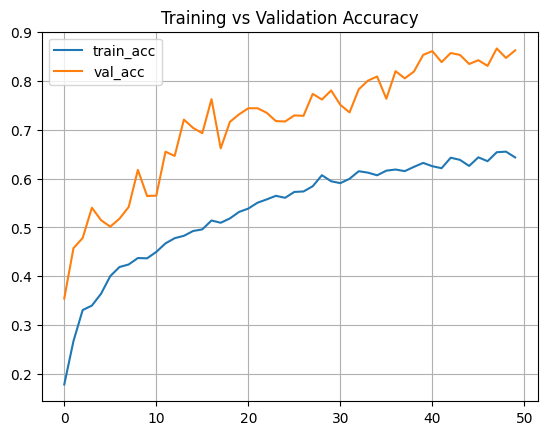

In [10]:
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

Save the Trained Model

In [11]:
model.save("Model 2.keras")

Evaluate on Val set

In [12]:
# Evaluate
model.load_weights('Model 2.keras')
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"\n🧠 Final Validation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.7684 - loss: 0.6926

🧠 Final Validation Accuracy: 0.7826, Loss: 0.6469


Evaluate on Test Set

In [13]:
# Test Directory
test_dir = 'cleaned_dataset_v2/test'

In [14]:
# Load the test images using ImageDataGenerator (make sure you match the batch size and image preprocessing you used during training)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Adjust the rescale factor as per your training setup
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Replace with your model's expected input size
    color_mode='rgb',  # Load images in grayscale
    batch_size=batch_size2,  # Choose the batch size as per your setup
    class_mode='categorical',  # or 'binary' based on your problem
    shuffle=False  # Make sure to not shuffle for evaluation
)

# Load your trained model
model = tf.keras.models.load_model('Model 2.keras')  # Replace with the path to your trained model

Found 1204 images belonging to 8 classes.


In [15]:
# Predict on the test set
predictions = model.predict(test_generator, verbose=1)
# Convert the predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Get the true labels from the test generator
true_labels = test_generator.classes

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step


In [16]:
# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")
# Calculate F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # 'weighted' is typically good for imbalanced classes
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8339
F1 Score: 0.8344


#### Little more Finetuning or Generalization

In [17]:
epochs = 100

Compile, Train, and Use Callbacks

In [19]:
# Initialize and compile the model
model2 = build_baseline_cnn(img_size, num_classes=len(label_encoder.classes_))
model2.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'Model 3.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [20]:
# Train the Model
history2 = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.1599 - loss: 2.0986
Epoch 1: val_loss improved from inf to 1.85846, saving model to Model 3.keras
323/323 ━━━━━━━━━━━━━━━━━━━━ 45s 134ms/step - accuracy: 0.1600 - loss: 2.0983 - val_accuracy: 0.2531 - val_loss: 1.8585
Epoch 2/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.2612 - loss: 1.8837
Epoch 2: val_loss improved from 1.85846 to 1.70599, saving model to Model 3.keras
323/323 ━━━━━━━━━━━━━━━━━━━━ 46s 140ms/step - accuracy: 0.2612 - loss: 1.8836 - val_accuracy: 0.3486 - val_loss: 1.7060
Epoch 3/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.3111 - loss: 1.7615
Epoch 3: val_loss improved from 1.70599 to 1.50019, saving model to Model 3.keras
323/323 ━━━━━━━━━━━━━━━━━━━━ 47s 142ms/step - accuracy: 0.3111 - loss: 1.7614 - val_accuracy: 0.4433 - val_loss: 1.5002
Epoch 4/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3816 - loss: 1.6131
Epoch 4: val_loss improved from 1.50019 to

Plot Training History

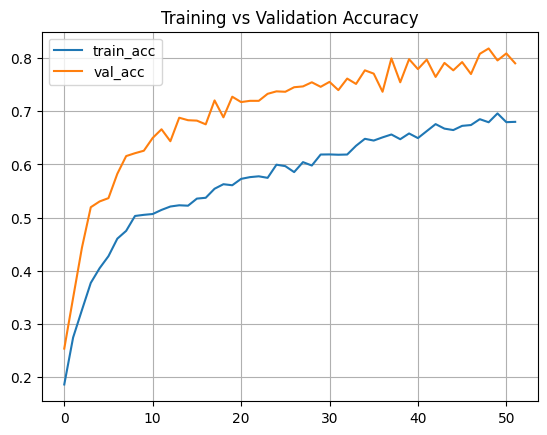

In [22]:
plt.plot(history2.history['accuracy'], label="train_acc")
plt.plot(history2.history['val_accuracy'], label="val_acc")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

Evaluate the Model

In [28]:
# Evaluate the Model 
model.load_weights('Model 3.keras')

# Evaluate on Validation Set
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"\n🧠 Final Validation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.7758 - loss: 0.6071

🧠 Final Validation Accuracy: 0.8028, Loss: 0.5533


Model Evaluation on Test Set

In [32]:
# Load your trained model
model = tf.keras.models.load_model('Model 3.keras')  

In [33]:
# Predict on the test set
predictions = model.predict(test_generator, verbose=1)
# Convert the predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_labels = test_generator.classes

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step


In [34]:
# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {accuracy:.4f}")
# Calculate F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # 'weighted' for imbalanced classes
print(f"Test F1 Score: {f1:.4f}")

Test Accuracy: 0.8771
Test F1 Score: 0.8764


Model Comparisons

In [35]:
from keras.models import load_model

model1 = load_model("Model 1.keras")
model2 = load_model("Model 2.keras")
model3 = load_model("Model 3.keras")
model4 = load_model("Model 4.keras")

In [ ]:
# Get predictions from model 1
probs1 = model1.predict(test_generator)
y_pred1 = np.argmax(probs1, axis=1)
y_true1 = test_generator.classes

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step


In [ ]:
# Get predictions from model 2
probs2 = model2.predict(test_generator)
y_pred2 = np.argmax(probs2, axis=1)
y_true2 = test_generator.classes

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step


In [ ]:
# Get predictions from model 3
probs3 = model3.predict(test_generator)
y_pred3 = np.argmax(probs3, axis=1)
y_true3 = test_generator.classes

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step


In [42]:
# Load for model 4
test_datagen2 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Adjust the rescale factor as per your training setup
test_generator2 = test_datagen2.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Replace with your model's expected input size
    color_mode='grayscale',  # Load images in grayscale
    batch_size=32,  # Choose the batch size as per your setup
    class_mode='categorical',  # or 'binary' based on your problem
    shuffle=False  # Make sure to not shuffle for evaluation
)

Found 1204 images belonging to 8 classes.


In [43]:
# Get predictions from model 4
probs4 = model4.predict(test_generator2)
y_pred4 = np.argmax(probs4, axis=1)
y_true4 = test_generator.classes

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


In [72]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score, accuracy_score, RocCurveDisplay, average_precision_score
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.calibration import calibration_curve

Evaluate Models (Accuracy, Precision, Recall, F1)

In [48]:
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }
results = {
    "Model 1": evaluate_model(y_true1, y_pred1),
    "Model 2": evaluate_model(y_true2, y_pred2),
    "Model 3": evaluate_model(y_true3, y_pred3),
    "Model 4": evaluate_model(y_true4, y_pred4),
}
results_df = pd.DataFrame(results).T
display(results_df)

,Accuracy,Precision,Recall,F1 Score
Model 1,0.863787,0.869657,0.863787,0.863672
Model 2,0.833887,0.842789,0.833887,0.834386
Model 3,0.877076,0.879784,0.877076,0.876396
Model 4,0.860465,0.864262,0.860465,0.859752


Confusion Matrices

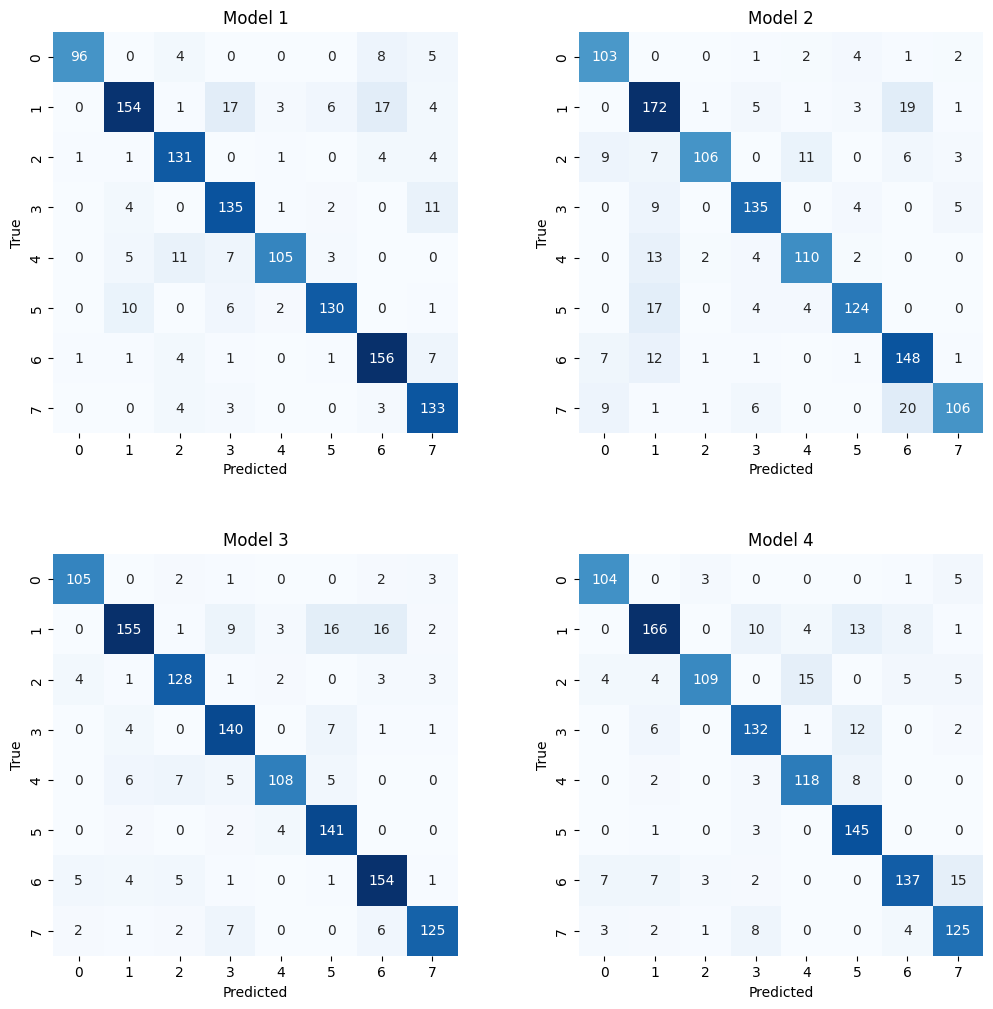

In [63]:
models = [("Model 1", y_true1, y_pred1),
          ("Model 2", y_true2, y_pred2),
          ("Model 3", y_true3, y_pred3),
          ("Model 4", y_true4, y_pred4)]
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Adjust size as needed
# Flatten axs to iterate over it easily
axs = axs.flatten()
# Loop over each model and corresponding axis
for i, (name, y_true, y_pred) in enumerate(models):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i], cbar=False)
    axs[i].set_title(name)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('True')
# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust the spacing between plots
# Show the plot
plt.show()

ROC Curve

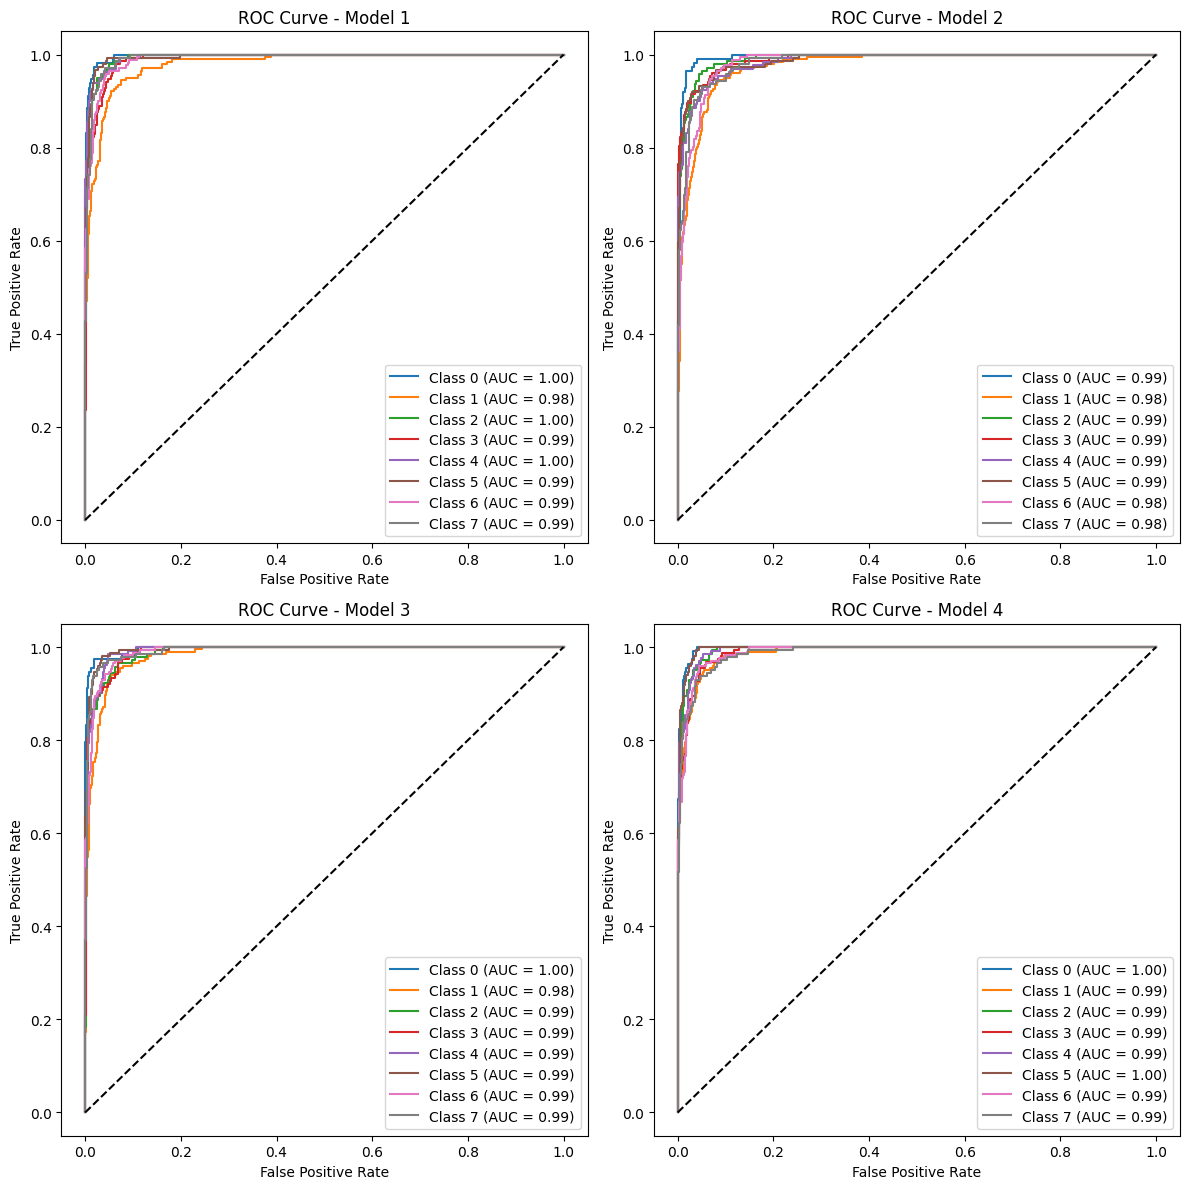

In [65]:
models = [("Model 1", y_true1, probs1),
          ("Model 2", y_true2, probs2),
          ("Model 3", y_true3, probs3),
          ("Model 4", y_true4, probs4)]
# Create a 2x2 grid of subplots for ROC curves
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Adjust size as needed
# Flatten the axs array to iterate over it easily
axs = axs.flatten()
for ax, (name, y_true, probs) in zip(axs, models):
    # Binarize the labels for multiclass ROC
    y_true_bin = label_binarize(y_true, classes=range(8))  # Assuming there are 8 classes
    fpr, tpr, roc_auc = {}, {}, {}
    # Compute ROC curve and AUC for each class
    for i in range(8):  # For each class in your multiclass classification
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        # Plot each class's ROC curve
        ax.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    # Add ROC curve diagonal (chance line)
    ax.plot([0, 1], [0, 1], 'k--')
    # Title and labels
    ax.set_title(f'ROC Curve - {name}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('all_models_roc_curve_2x2.png')
plt.show()

PR Curve

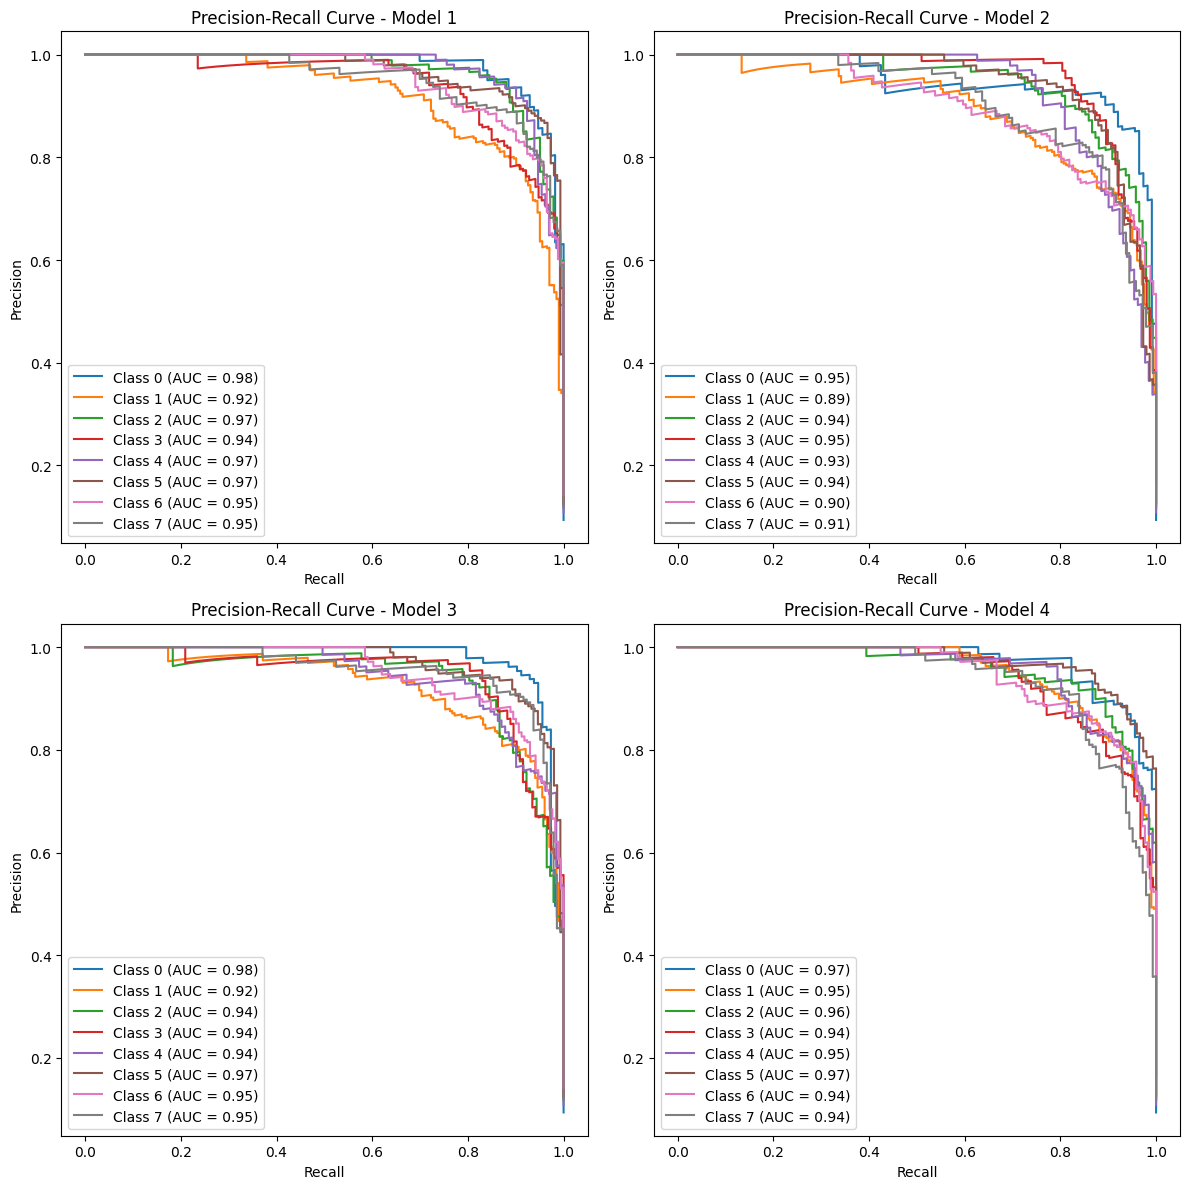

In [70]:
models = [("Model 1", y_true1, probs1),
          ("Model 2", y_true2, probs2),
          ("Model 3", y_true3, probs3),
          ("Model 4", y_true4, probs4)]
# Create a 2x2 grid of subplots for PR curves
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Adjust size as needed
# Flatten the axs array to iterate over it easily
axs = axs.flatten()
for ax, (name, y_true, probs) in zip(axs, models):
    # Binarize the labels for multiclass PR
    y_true_bin = label_binarize(y_true, classes=range(8))  # Assuming there are 8 classes
    precision, recall, pr_auc = {}, {}, {}
    # Compute PR curve and AUC for each class
    for i in range(8):  # For each class in your multiclass classification
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], probs[:, i])
        pr_auc[i] = average_precision_score(y_true_bin[:, i], probs[:, i])
        # Plot each class's PR curve
        ax.plot(recall[i], precision[i], label=f'Class {i} (AUC = {pr_auc[i]:.2f})')
    # Title and labels
    ax.set_title(f'Precision-Recall Curve - {name}')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('all_models_pr_curve_2x2.png')
plt.show()

Metrics Comparison Bar Plot

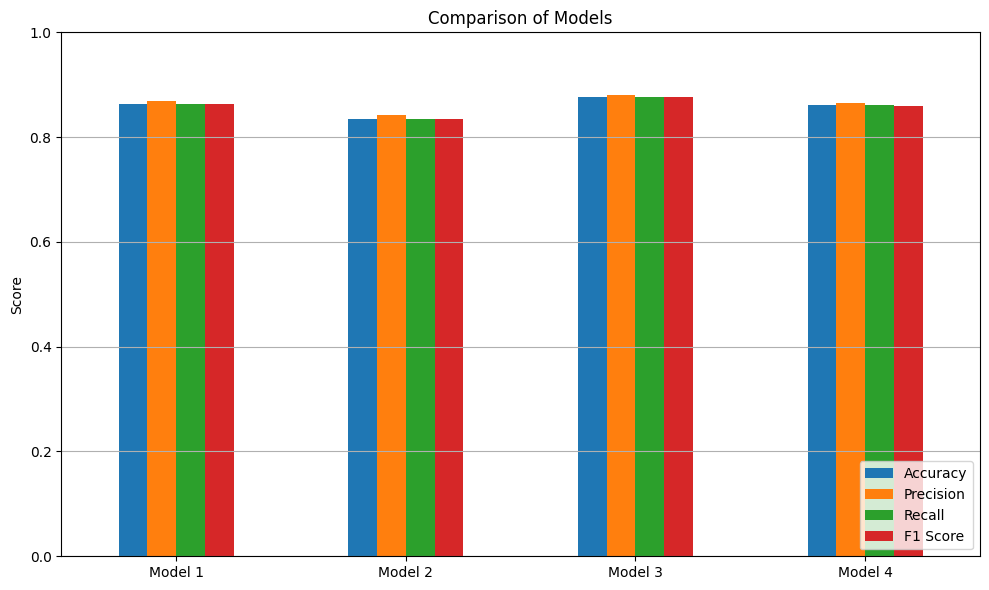

In [71]:
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Comparison of Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig("model_comparison_bar.png")
plt.show()

Caliberation Curve

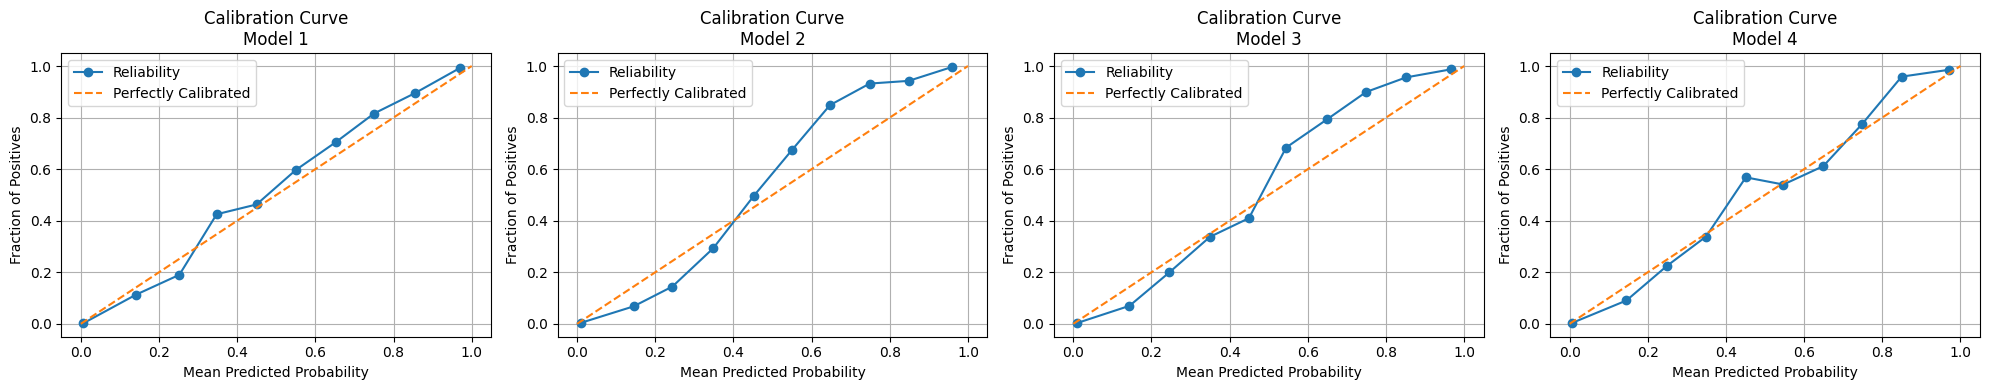

In [73]:
# Make sure classes are binarized for multiclass calibration curve
n_classes = probs1.shape[1]
y_true_bin = label_binarize(y_true1, classes=np.arange(n_classes))
# Setup
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
models_probs = [probs1, probs2, probs3, probs4]
titles = ["Model 1", "Model 2", "Model 3", "Model 4"]
for i, (ax, probs, title) in enumerate(zip(axs, models_probs, titles)):
    mean_true, mean_pred = calibration_curve(y_true_bin.ravel(), probs.ravel(), n_bins=10, strategy='uniform')
    ax.plot(mean_pred, mean_true, marker='o', label="Reliability")
    ax.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
    ax.set_title(f'Calibration Curve\n{title}')
    ax.set_xlabel('Mean Predicted Probability')
    ax.set_ylabel('Fraction of Positives')
    ax.legend()
    ax.grid()
plt.tight_layout()
# plt.savefig("calibration_curves.png")
plt.show()

Learning Curves

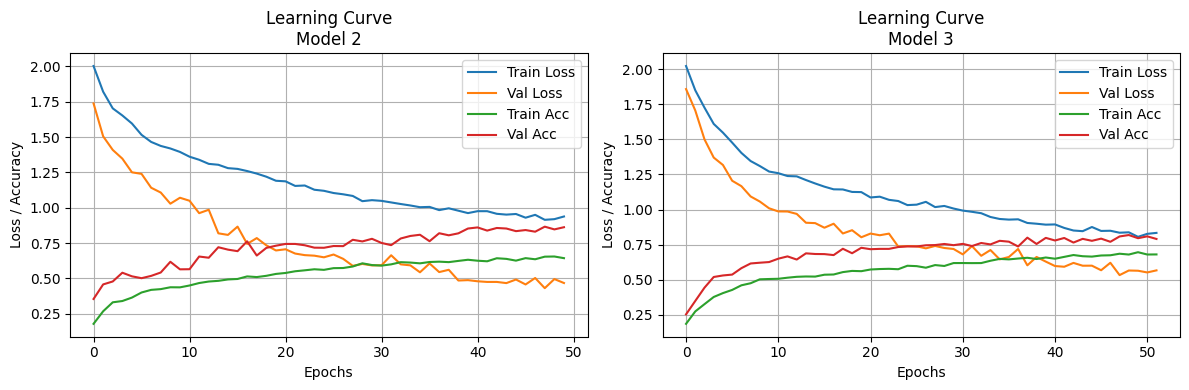

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
titles = ["Model 2", "Model 3"]
histories = [history, history2]
for ax, hist, title in zip(axs, histories, titles):
    ax.plot(hist.history['loss'], label='Train Loss')
    ax.plot(hist.history['val_loss'], label='Val Loss')
    ax.plot(hist.history['accuracy'], label='Train Acc')
    ax.plot(hist.history['val_accuracy'], label='Val Acc')
    ax.set_title(f'Learning Curve\n{title}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss / Accuracy')
    ax.legend()
    ax.grid()
plt.tight_layout()
# plt.savefig("partial_learning_curves.png")
plt.show()